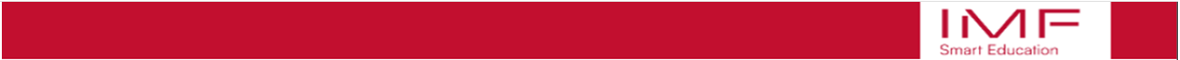

## Modulo III : La ciencia de datos. Técnicas de análisis, minería y visualización

#### EVALUACIÓN FINAL DE MÓDULO 

### Desarrolle el ejercicio según las indicaciones
**Caso práctico: *COMPAS (Correctional offender management profiling for alternative sanctions)***

**Docente: Juan Manuel Moreno Lamparero**  
**Estudiante: Richard Douglas Grijalba.**

**Detalles del Dataset**

Un ejemplo bien conocido de ello es el sistema **COMPAS (Correctional offender management profiling for alternative sanctions)** que se usa en varios estados de los Estados Unidos para hacer una evaluación del riesgo de reincidencia de las personas detenidas.  
En este caso, proporciona un conjunto de datos en bruto con información de las evaluaciones (fichero compas-scores.csv) y la historia legal de unos 11 000 casos en los años 2013 y 2014 (se trata de uno de los ficheros originales utilizados en un análisis independiente del sistema COMPAS llevado a cabo por ProPublica, disponible en internet).


Aunque el conjunto de datos contiene información adicional, para resolver las cuestiones planteadas en este caso son necesarios (aparte de algunos campos cuyo nombre es autoexplicativo) los siguientes campos:

**Descripción de variables contenidas en el Dataset**

•	**“compas_screening_date”**: se refiere a la fecha en la que se realizó la evaluación  
•	**“decile_score”**: es un número, de 1 a 10 que indica el riesgo de reincidencia en general (a mayor riesgo, mayor número).  
•	**“v_decile_score”**: es un número de 1 a 10, potencialmente distinto del anterior, que indica el riesgo de reincidencia en delitos violentos. Al hacer la evaluación de un caso en COMPAS, se generan las dos puntuaciones (entre otras cosas).  
•	**“is_recid”**: indicación de si la persona es reincidente (en el tiempo en que se recogen datos: no hay información de si la persona es reincidente más allá de ciertas fechas, y es importante tener esto en cuenta para asegurarse de hacer comparaciones homogéneas).   
•	**“r_offense_date”**: fecha en la que se cometió el delito por el que se considera reincidente a la persona.    
•	**“is_violent_recid”**: indicación de si la persona es reincidente en un delito con violencia (las mismas consideraciones sobre fechas que para “is_recid” aplican aquí)".    
•	**“vr_offense_date”**: fecha en la que se cometió el delito violento que da lugar a la consideración de reincidente.

###  Se pide para el desarrollo de este caso:

*  Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso.
    Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

*  ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

*  El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante.
Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).


* El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no.
Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.      


* ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?



###  Resolución del caso estableciendo un proceso :

El desarrollo o solución de un caso de analisis de datos, data science, no es del todo lineal, tiene aspectos o caracteristicas propias en las que debemos replantearnos o cuestionarnos durante el desarrollo del mismo si estamos guiando una solución acorde a lo esperado. Por lo que es normal que durante el desarrollo o planteamiento de codigos para el desarrollo del caso, se tenga que verificar nuevamente el planteamiento inicial, esto para no seguir con un analisis que pueda no ser satisfactorio.

*  **Establecer el marco del problema:**  nos cuestionamos el Qué? Cómo?  vamos a desarrollar, a qué le vamos a dar respuesta, en función d elos datos disponibles o que se deben obtener

*  **Entender los datos:** Trabajar con los datos, transformar los datos, recolectar los datos, entender lo que nos dicen los datos

*  **Modelar y analizar:** Realozar features necesarios y útiles para el desarrollo del caso y dar respuesta al problema de Data Analytics planteado.

*  **Conclusiones** Se generan resultados de los datos obtenidos, se pueden realizar gráficas, tablas y cuadros, pero lo más importante es cómo transmitir ese mensaje.

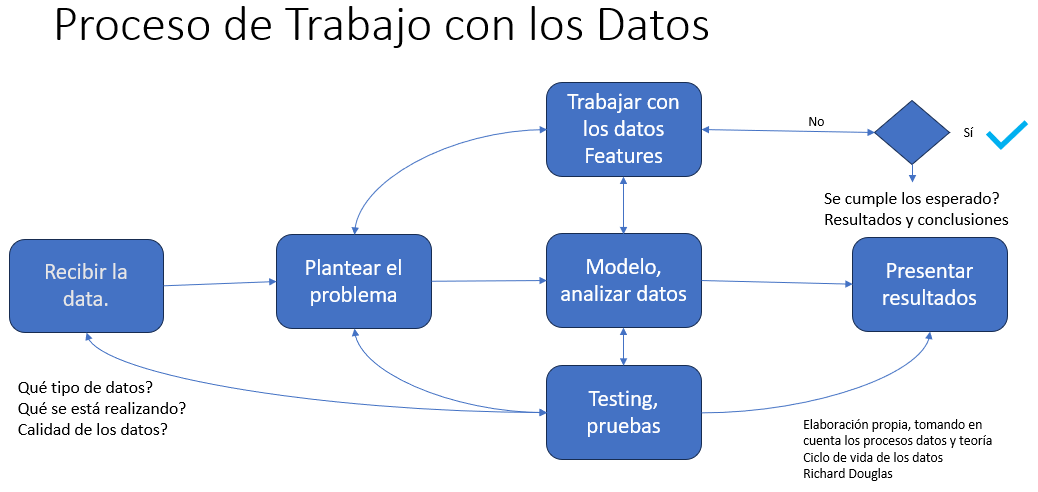

**1. importar las librerias**

In [1]:
import pandas as pd
import numpy as np
import datetime
import os.path
import altair as alt
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings  #El módulo warnings suprime mensajes de alerta en algunos codigos
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
cwd = os.getcwd()   # este es mi ambiente de trabajo
cwd

'C:\\Users\\Rdouglas'

## 2. Carga de datos, análisis exploratorio y preproceso

In [5]:
# Cargamos los datos del fichero .csv
df = pd.read_csv('IMF- fudamentos de Python/datos/compas-scores.csv')

In [6]:
# Información general del contenido de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11757 non-null  int64  
 1   name                     11757 non-null  object 
 2   first                    11757 non-null  object 
 3   last                     11757 non-null  object 
 4   compas_screening_date    11757 non-null  object 
 5   sex                      11757 non-null  object 
 6   dob                      11757 non-null  object 
 7   age                      11757 non-null  int64  
 8   age_cat                  11757 non-null  object 
 9   race                     11757 non-null  object 
 10  juv_fel_count            11757 non-null  int64  
 11  decile_score             11757 non-null  int64  
 12  juv_misd_count           11757 non-null  int64  
 13  juv_other_count          11757 non-null  int64  
 14  priors_count          

In [7]:
df.columns  # codigo para ver el nombre de todas las columnas

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'num_r_cases',
       'r_case_number', 'r_charge_degree', 'r_days_from_arrest',
       'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out',
       'is_violent_recid', 'num_vr_cases', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'type_of_assessment', 'decile_score.1',
       'score_text', 'screening_date'],
      dtype='object')

In [8]:
df.head(5)  # se procede a ver una vista previa del contenido del dataset, se visualizan datos NaN

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13


In [9]:
df.describe()  # queremos son est codigo observar alguna informacion estadistica resumida de las caracteristicas numéricas

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,num_r_cases,r_days_from_arrest,is_violent_recid,num_vr_cases,v_decile_score,decile_score.1
count,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,11757.000000,10577.000000,11015.000000,11757.000000,0.0,2460.000000,11757.000000,0.0,11757.000000,11757.000000
mean,5879.000000,35.143319,0.061580,4.371268,0.076040,0.093561,3.082164,-0.878037,63.587653,0.253806,NaN,20.410569,0.075019,NaN,3.571489,4.371268
std,3394.097892,12.022894,0.445328,2.877598,0.449757,0.472003,4.687410,72.889298,341.899711,0.558324,NaN,74.354840,0.263433,NaN,2.500479,2.877598
min,1.000000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,NaN,-1.000000,0.000000,NaN,-1.000000,-1.000000
25%,2940.000000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,1.000000,2.000000
50%,5879.000000,32.000000,0.000000,4.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,NaN,0.000000,0.000000,NaN,3.000000,4.000000
75%,8818.000000,43.000000,0.000000,7.000000,0.000000,0.000000,4.000000,-1.000000,2.000000,1.000000,NaN,1.000000,0.000000,NaN,5.000000,7.000000
max,11757.000000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,NaN,993.000000,1.000000,NaN,10.000000,10.000000


In [10]:
df.describe().T  # la mismas información pero de esta vez las columnas aparecen en filas 

,count,mean,std,min,25%,50%,75%,max
id,11757.0,5879.000000,3394.097892,1.0,2940.0,5879.0,8818.0,11757.0
age,11757.0,35.143319,12.022894,18.0,25.0,32.0,43.0,96.0
juv_fel_count,11757.0,0.061580,0.445328,0.0,0.0,0.0,0.0,20.0
decile_score,11757.0,4.371268,2.877598,-1.0,2.0,4.0,7.0,10.0
juv_misd_count,11757.0,0.076040,0.449757,0.0,0.0,0.0,0.0,13.0
juv_other_count,11757.0,0.093561,0.472003,0.0,0.0,0.0,0.0,17.0
priors_count,11757.0,3.082164,4.687410,0.0,0.0,1.0,4.0,43.0
days_b_screening_arrest,10577.0,-0.878037,72.889298,-597.0,-1.0,-1.0,-1.0,1057.0
c_days_from_compas,11015.0,63.587653,341.899711,0.0,1.0,1.0,2.0,9485.0
is_recid,11757.0,0.253806,0.558324,-1.0,0.0,0.0,1.0,1.0


In [11]:
df.size  # conocer el tamaño del datset

552579

In [12]:
df.describe(include = 'object')  # vemos con esto una descripcion de las caracteriticas que están tipo objecto

,name,first,last,compas_screening_date,sex,dob,age_cat,race,c_jail_in,c_jail_out,...,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_score_text,v_screening_date,type_of_assessment,score_text,screening_date
count,11757,11757,11757,11757,11757,11757,11757,11757,10577,10577,...,882,882,882,882,11757,11752,11757,11757,11742,11757
unique,11584,4058,5921,704,2,7800,3,6,10577,10517,...,882,9,599,88,1,3,704,1,3,704
top,john brown,michael,williams,2013-03-20,Male,1992-10-15,25 - 45,African-American,2014-10-26 06:27:53,2014-02-12 10:41:00,...,14017393MM10A,(M1),2015-08-15,Battery,Risk of Violence,Low,2013-03-20,Risk of Recidivism,Low,2013-03-20
freq,4,264,145,39,9336,6,6649,5813,1,4,...,1,372,6,356,11757,7968,39,11757,6607,39


### ***Vamos a proceder a revisa el número de nulos que hay por cada columna, así como su porcentaje.***

Esto para cumplir con lo solicitado en lo que indica que se debe explorar la calidad de los datos 

*una evaluación de la calidad de los datos necesarios para el resto del caso.*
*Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.*


In [13]:
def show_nulls(df):     # funcion reutilizada vista en los cursos  # revisar la cantidad de valores nulos o faltantes
    # Nulos totales
    total_nan = df.isnull().sum()
    # Porcentaje nulos
    perc_nan = total_nan/len(df)*100
    
    return total_nan, perc_nan

In [14]:
print('Total nulos ', show_nulls(df=df)[0])

Total nulos  id                             0
name                           0
first                          0
last                           0
compas_screening_date          0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1180
c_jail_in                   1180
c_jail_out                  1180
c_case_number                742
c_offense_date              2600
c_arrest_date               9899
c_days_from_compas           742
c_charge_degree                0
c_charge_desc                749
is_recid                       0
num_r_cases                11757
r_case_number               8054
r_charge_degree                0
r_days_from_arrest          9297
r_offense_date              80

In [15]:
print('Porcentaje de nulos ', show_nulls(df=df)[1])

Porcentaje de nulos  id                           0.000000
name                         0.000000
first                        0.000000
last                         0.000000
compas_screening_date        0.000000
sex                          0.000000
dob                          0.000000
age                          0.000000
age_cat                      0.000000
race                         0.000000
juv_fel_count                0.000000
decile_score                 0.000000
juv_misd_count               0.000000
juv_other_count              0.000000
priors_count                 0.000000
days_b_screening_arrest     10.036574
c_jail_in                   10.036574
c_jail_out                  10.036574
c_case_number                6.311134
c_offense_date              22.114485
c_arrest_date               84.196649
c_days_from_compas           6.311134
c_charge_degree              0.000000
c_charge_desc                6.370673
is_recid                     0.000000
num_r_cases                10

### Qué nos dicen esos valores nulos?

Vemos que varias caracteristicas nos indican presencia de una gran cantidad de datos o información con problemas (nulos,missing, NaN)  el impacto de estos valores nulos/missing van desde aquellos que presentan un porcentaje muy bajo  0.12%, 6 % , hasta caacteristicas con valores nulos de un 84% a un 100%.  Por lo que se procede a identificar lo que contienen estas caracteristicas, si se valora la limpieza de estos datos o la eliminación o si en su caso las caracteristicas no tienen peso en el análisis en desarrollo.

## Seleecionar la columnas que tienen relevancia para el desarrollo de este caso

Aunque el conjunto de datos contiene información adicional, para resolver las cuestiones planteadas en este caso son necesarios (aparte de algunos campos cuyo nombre es autoexplicativo) los siguientes campos:

In [16]:
df = df[['id','name', 'age','age_cat', 'sex', 'race', 'compas_screening_date', 'decile_score', 'v_decile_score','c_charge_degree', 'is_recid', 'days_b_screening_arrest','r_offense_date', 'is_violent_recid', 'vr_offense_date','c_jail_in','c_jail_out', 'priors_count' 
 ]].copy()

In [17]:
df.head(5)

,id,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,c_charge_degree,is_recid,days_b_screening_arrest,r_offense_date,is_violent_recid,vr_offense_date,c_jail_in,c_jail_out,priors_count
0,1,miguel hernandez,69,Greater than 45,Male,Other,2013-08-14,1,1,F,0,-1.0,NaN,0,NaN,2013-08-13 06:03:42,2013-08-14 05:41:20,0
1,2,michael ryan,31,25 - 45,Male,Caucasian,2014-12-31,5,2,O,-1,NaN,NaN,0,NaN,NaN,NaN,0
2,3,kevon dixon,34,25 - 45,Male,African-American,2013-01-27,3,1,F,1,-1.0,2013-07-05,1,2013-07-05,2013-01-26 03:45:27,2013-02-05 05:36:53,0
3,4,ed philo,24,Less than 25,Male,African-American,2013-04-14,4,3,F,1,-1.0,2013-06-16,0,NaN,2013-04-13 04:58:34,2013-04-14 07:02:04,4
4,5,marcu brown,23,Less than 25,Male,African-American,2013-01-13,8,6,F,0,NaN,NaN,0,NaN,NaN,NaN,1


In [18]:
df.columns

Index(['id', 'name', 'age', 'age_cat', 'sex', 'race', 'compas_screening_date',
       'decile_score', 'v_decile_score', 'c_charge_degree', 'is_recid',
       'days_b_screening_arrest', 'r_offense_date', 'is_violent_recid',
       'vr_offense_date', 'c_jail_in', 'c_jail_out', 'priors_count'],
      dtype='object')

## Calidad de los datos  
### Evaluar la integridad, validez y actualidad de los datos

#### Tratamiento y Procesamiento de Datos Nulos y/o faltantes

Según la exploración inicial del dataset tenemos un dataset con una serie de columnas, las cuales algunas vienen en formato object, float.
Sin embargo se presenta el caso de tener columnas con muchos datos con problemas, a pesar de esto se puede continuar con el procesamiento de los datos, en vista que además se debe considerar la importancia de la columna o datos faltantes para el desarrollo de modelo.

una vez seleccionadas las columnas de relevancia, se puede ver que la calidad de los datos mejoró mucho, esto nos indica que podemos proceder:

In [19]:
df.columns

Index(['id', 'name', 'age', 'age_cat', 'sex', 'race', 'compas_screening_date',
       'decile_score', 'v_decile_score', 'c_charge_degree', 'is_recid',
       'days_b_screening_arrest', 'r_offense_date', 'is_violent_recid',
       'vr_offense_date', 'c_jail_in', 'c_jail_out', 'priors_count'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11757 non-null  int64  
 1   name                     11757 non-null  object 
 2   age                      11757 non-null  int64  
 3   age_cat                  11757 non-null  object 
 4   sex                      11757 non-null  object 
 5   race                     11757 non-null  object 
 6   compas_screening_date    11757 non-null  object 
 7   decile_score             11757 non-null  int64  
 8   v_decile_score           11757 non-null  int64  
 9   c_charge_degree          11757 non-null  object 
 10  is_recid                 11757 non-null  int64  
 11  days_b_screening_arrest  10577 non-null  float64
 12  r_offense_date           3703 non-null   object 
 13  is_violent_recid         11757 non-null  int64  
 14  vr_offense_date       

### Caracteristicas con los valores completos 

In [21]:
def no_show_nulls(df):         # se le realiza una modificacón a la función previamente vista, para ver el toal y el % de los datoscon sin problemas
    # Nulos totales
    total_nan = df.isnull().sum()
    # Porcentaje nulos
    perc_nan = (total_nan/len(df))*100

    # Crear un nuevo dataframe para mostrar los resultados
    result = pd.DataFrame({'Total NaN': total_nan, 'Percentage NaN': perc_nan})

    # Filtrar las columnas donde el porcentaje de NaN es mayor a 0
    result = result[result['Percentage NaN'] == 0]

    return result

In [22]:
print('Valores completos ', no_show_nulls(df=df))

Valores completos                         Total NaN  Percentage NaN
id                             0             0.0
name                           0             0.0
age                            0             0.0
age_cat                        0             0.0
sex                            0             0.0
race                           0             0.0
compas_screening_date          0             0.0
decile_score                   0             0.0
v_decile_score                 0             0.0
c_charge_degree                0             0.0
is_recid                       0             0.0
is_violent_recid               0             0.0
priors_count                   0             0.0


#### Fechas en las que se realizaron las tomas de los datos

Según lo india parte del mimos enunciado los datos que componen este dataset, datan de los años 2013 y 2014, y recopilan la informacón del historia legal de unos 11 000 casos en los años 

In [23]:
df.loc[:, 'c_jail_in'] # Columna tipo objeto, por lo que vamos a transformar las columnas de fechas que están en tipo objeto 

0        2013-08-13 06:03:42
1                        NaN
2        2013-01-26 03:45:27
3        2013-04-13 04:58:34
4                        NaN
                ...         
11752    2013-09-21 04:06:00
11753    2013-05-16 08:58:35
11754                    NaN
11755    2013-05-21 03:12:58
11756    2014-01-10 06:49:02
Name: c_jail_in, Length: 11757, dtype: object

In [24]:
df['c_jail_in']= pd.to_datetime(df['c_jail_in'])
df['c_jail_out']= pd.to_datetime(df['c_jail_out'])
df['r_offense_date']= pd.to_datetime(df['r_offense_date'])
df['vr_offense_date']= pd.to_datetime(df.vr_offense_date, format="%Y-%m-%d")
df['compas_screening_date']= pd.to_datetime(df.compas_screening_date, format="%Y-%m-%d")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       11757 non-null  int64         
 1   name                     11757 non-null  object        
 2   age                      11757 non-null  int64         
 3   age_cat                  11757 non-null  object        
 4   sex                      11757 non-null  object        
 5   race                     11757 non-null  object        
 6   compas_screening_date    11757 non-null  datetime64[ns]
 7   decile_score             11757 non-null  int64         
 8   v_decile_score           11757 non-null  int64         
 9   c_charge_degree          11757 non-null  object        
 10  is_recid                 11757 non-null  int64         
 11  days_b_screening_arrest  10577 non-null  float64       
 12  r_offense_date           3703 no

In [26]:
df.c_jail_in.min(), df.c_jail_in.max()

(Timestamp('2013-01-01 01:31:55'), Timestamp('2016-03-11 10:26:16'))

In [27]:
df.c_jail_out.min(), df.c_jail_out.max()

(Timestamp('2013-01-02 01:12:01'), Timestamp('2020-01-01 00:00:00'))

In [28]:
df.vr_offense_date.min(), df.vr_offense_date.max()

(Timestamp('2013-01-28 00:00:00'), Timestamp('2016-03-13 00:00:00'))

*Segun los datos de las caracteristias con fechas* los rangos de fechas van desde del 2013 hasta información de fechas 2020.

####  Valores Unicos en las caracteristicas

In [29]:
df.nunique()

id                         11757
name                       11584
age                           66
age_cat                        3
sex                            2
race                           6
compas_screening_date        704
decile_score                  11
v_decile_score                11
c_charge_degree                3
is_recid                       3
days_b_screening_arrest      552
r_offense_date              1090
is_violent_recid               2
vr_offense_date              599
c_jail_in                  10577
c_jail_out                 10517
priors_count                  39
dtype: int64

In [30]:
def describe_columna(df, col):    # funcion para conocer los valores que mas se repiten
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, '\t', v)

**Queremos conocer los valores que más se repiten en el nombre (name) y además en los apellidos**, a ver si es posible que exista un detalle repetido, o si es posible que estos datos repetidos indiquen que son personas diferentes o una reincidencia en el delito, que es parte del análisis que se irá desarrollando en este caso

In [31]:
describe_columna(df, 'name')

Columna: name  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 11584
Valores más frecuentes:
john brown 	 4
michael cunningham 	 4
carlos vasquez 	 4
robert taylor 	 4
michael williams 	 3
anthony jackson 	 3
travis wilson 	 3
james smith 	 3
steven wilson 	 3
gregory williams 	 3


**Vamos a verificar si corresponde a un dato duplicado, o si corresponde a personas diferentes o una reincidencia**

In [32]:
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, '\t', v)

In [33]:
describe_columna(df, 'name')

Columna: name  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 11584
Valores más frecuentes:
john brown 	 4
michael cunningham 	 4
carlos vasquez 	 4
robert taylor 	 4
michael williams 	 3
anthony jackson 	 3
travis wilson 	 3
james smith 	 3
steven wilson 	 3
gregory williams 	 3


In [34]:
df[df.name.duplicated(keep = False)].sort_values(by = 'name')

,id,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,c_charge_degree,is_recid,days_b_screening_arrest,r_offense_date,is_violent_recid,vr_offense_date,c_jail_in,c_jail_out,priors_count
11585,11586,alejandro cabrera,26,25 - 45,Male,Hispanic,2013-10-07,4,3,O,-1,NaN,NaT,0,NaT,NaT,NaT,0
6536,6537,alejandro cabrera,26,25 - 45,Male,Caucasian,2013-09-23,4,3,F,1,0.0,2013-10-06,1,2013-10-06,2013-09-23 12:36:24,2013-09-26 08:28:31,4
2794,2795,alexander williams,60,Greater than 45,Male,African-American,2014-12-08,7,1,F,0,-1.0,NaT,0,NaT,2014-12-07 09:29:01,2015-03-02 11:37:49,15
10321,10322,alexander williams,28,25 - 45,Male,African-American,2014-12-20,3,3,O,-1,NaN,NaT,0,NaT,NaT,NaT,0
3746,3747,angel santiago,37,25 - 45,Male,Caucasian,2013-05-26,6,4,M,0,-1.0,NaT,0,NaT,2013-05-25 05:53:02,2013-05-26 08:34:47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,8369,william taylor,47,Greater than 45,Male,Caucasian,2013-04-02,2,3,M,0,-1.0,NaT,0,NaT,2013-04-01 10:51:38,2013-04-06 07:54:08,5
1122,1123,willie johnson,50,Greater than 45,Male,African-American,2013-09-09,9,6,F,0,0.0,NaT,0,NaT,2013-09-09 01:51:41,2013-09-11 04:56:45,11
7396,7397,willie johnson,22,Less than 25,Male,African-American,2014-06-11,10,9,F,0,-1.0,NaT,0,NaT,2014-06-10 07:18:44,2014-06-11 10:40:39,9
3428,3429,xavier johnson,21,Less than 25,Male,African-American,2013-01-19,6,9,F,1,-1.0,2013-05-24,0,NaT,2013-01-18 07:32:20,2013-01-22 05:57:43,0


In [35]:
name1= df[df['name'] == 'michael cunningham']
name1

,id,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,c_charge_degree,is_recid,days_b_screening_arrest,r_offense_date,is_violent_recid,vr_offense_date,c_jail_in,c_jail_out,priors_count
348,349,michael cunningham,28,25 - 45,Male,Caucasian,2013-05-17,1,2,F,0,-3.0,NaT,0,NaT,2013-05-14 04:20:05,2013-05-17 10:53:34,1
3456,3457,michael cunningham,48,Greater than 45,Male,African-American,2014-03-17,1,1,F,0,-1.0,NaT,0,NaT,2014-03-16 08:38:24,2014-03-17 01:44:33,1
6287,6288,michael cunningham,53,Greater than 45,Male,Other,2014-07-18,1,1,F,0,-1.0,NaT,0,NaT,2014-07-17 12:14:42,2014-07-18 08:13:45,0
9960,9961,michael cunningham,32,25 - 45,Male,African-American,2014-06-02,6,6,M,0,-1.0,NaT,0,NaT,2014-06-01 05:51:51,2014-06-02 07:09:03,0


In [36]:
name2= df[df['name'] == 'robert taylor']
name2

,id,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,c_charge_degree,is_recid,days_b_screening_arrest,r_offense_date,is_violent_recid,vr_offense_date,c_jail_in,c_jail_out,priors_count
2274,2275,robert taylor,23,Less than 25,Male,Caucasian,2013-01-27,6,5,O,-1,NaN,NaT,0,NaT,NaT,NaT,0
5498,5499,robert taylor,48,Greater than 45,Male,Caucasian,2014-08-13,1,1,O,-1,NaN,NaT,0,NaT,NaT,NaT,0
10373,10374,robert taylor,21,Less than 25,Male,African-American,2013-09-30,10,7,O,-1,NaN,NaT,0,NaT,NaT,NaT,0
10413,10414,robert taylor,49,Greater than 45,Male,Native American,2014-02-06,4,2,O,-1,NaN,NaT,0,NaT,NaT,NaT,0


In [37]:
name3= df[df['name'] == 'alejandro cabrera']
name3

,id,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,c_charge_degree,is_recid,days_b_screening_arrest,r_offense_date,is_violent_recid,vr_offense_date,c_jail_in,c_jail_out,priors_count
6536,6537,alejandro cabrera,26,25 - 45,Male,Caucasian,2013-09-23,4,3,F,1,0.0,2013-10-06,1,2013-10-06,2013-09-23 12:36:24,2013-09-26 08:28:31,4
11585,11586,alejandro cabrera,26,25 - 45,Male,Hispanic,2013-10-07,4,3,O,-1,NaN,NaT,0,NaT,NaT,NaT,0


In [38]:
names_sort= df.groupby('name').size()
names_sort.sort_values(ascending=False)

name
michael cunningham    4
carlos vasquez        4
john brown            4
robert taylor         4
gregory williams      3
                     ..
melton mustafa        1
melonie burns         1
melody odonnell       1
melody moening        1
aajah herrington      1
Length: 11584, dtype: int64

**Según lo observado** correspoden a personas diferentes en algunos casos, así tambien como una reincidencia en el caso. 

### Caracteristica Age

In [39]:
age_sort=df.groupby('age').size()
age_sort.sort_values(ascending=False)

age
26    540
24    539
25    521
23    507
27    506
     ... 
83      2
86      1
79      1
80      1
96      1
Length: 66, dtype: int64

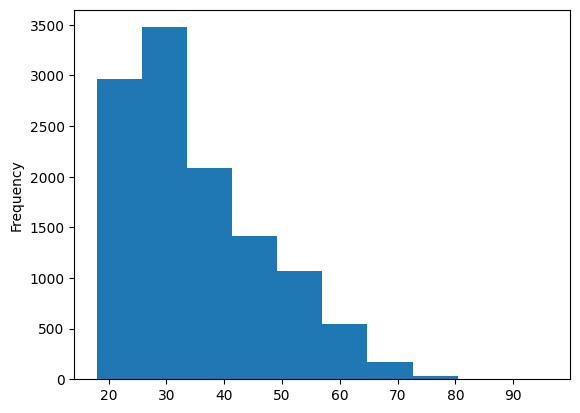

In [40]:
df['age'].plot.hist();  

### Caracteristica sex 

In [41]:
sex_sort=df.groupby('sex').size()
sex_sort

sex
Female    2421
Male      9336
dtype: int64

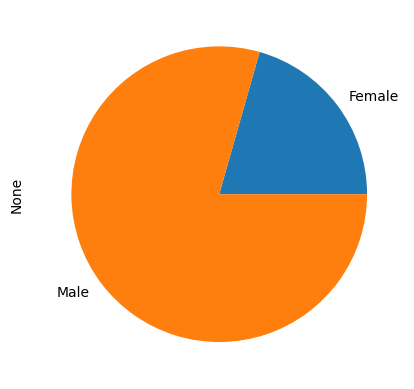

In [42]:
df.groupby('sex').size().plot(kind = 'pie');

### decile_score

**“decile_score”**: es un número, de 1 a 10 que indica el riesgo de reincidencia en general (a mayor riesgo, mayor número).


In [43]:
decile_sort=df.groupby('decile_score').size()
decile_sort

decile_score
-1       15
 1     2577
 2     1572
 3     1259
 4     1199
 5     1034
 6      993
 7      900
 8      796
 9      802
 10     610
dtype: int64

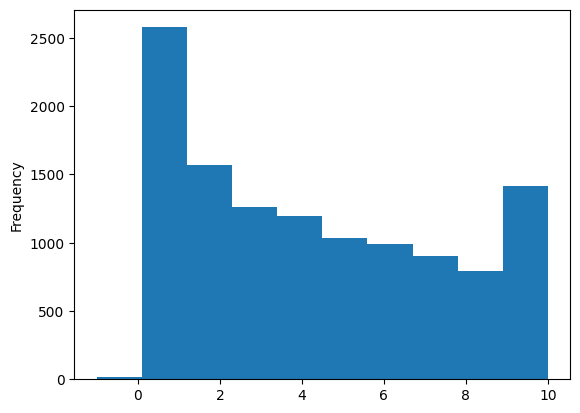

In [44]:
df['decile_score'].plot.hist();  

Es valor negativo no debe estar ahí, por lo que el mismo debe ser tratado

In [45]:
df['decile_score'].mean()

4.371268180658332

In [46]:
df['decile_score'].median()

4.0

### En este caso de procede a eliminar esos datos de valor -1 , son solo 11 registros

In [47]:
df.drop(df[df.decile_score == -1].index, inplace=True)

In [48]:
decile_sort=df.groupby('decile_score').size()
decile_sort

decile_score
1     2577
2     1572
3     1259
4     1199
5     1034
6      993
7      900
8      796
9      802
10     610
dtype: int64

### priors_count
una variable continua que contiene el número de delitos anteriores cometidos

In [49]:
priors_sort=df.groupby('priors_count').size()
priors_sort.sort_values(ascending=False)

priors_count
0     4177
1     2195
2     1279
3      855
4      588
5      474
6      349
7      315
8      260
9      201
10     160
11     135
13     111
12     107
14      83
15      68
16      60
17      52
18      45
19      40
20      28
21      26
23      24
22      22
24      16
26      13
25      12
27      12
28       9
29       8
30       4
33       4
31       2
35       2
38       2
37       1
39       1
36       1
43       1
dtype: int64

In [50]:
df['priors_count'].describe()

count    11742.000000
mean         3.084909
std          4.689620
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         43.000000
Name: priors_count, dtype: float64

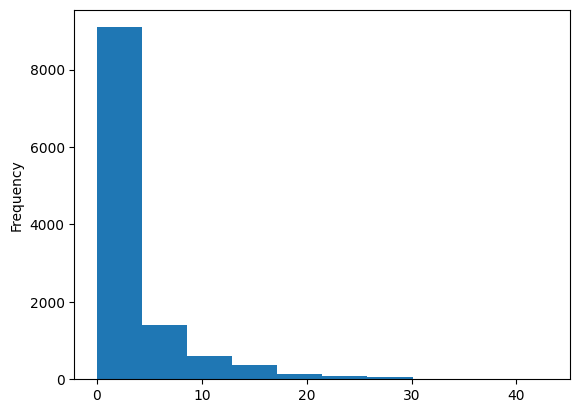

In [51]:
df['priors_count'].plot.hist();  

### c_charge_degree

**Felony:** Una condena por un delito grave conlleva largas penas de prisión, multas y una pérdida potencialmente permanente de la libertad.

**misdemeanor:** Una condena por un delito menor generalmente implica penas de cárcel, multas menores y castigos temporales.

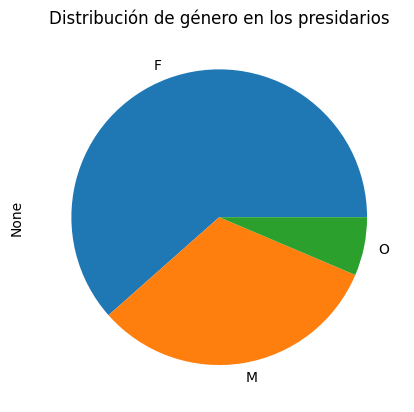

In [52]:
df.groupby('c_charge_degree').size().plot(kind='pie')

# Agregar un título al gráfico
plt.title('Distribución de género en los presidarios')
# Mostrar el gráfico
plt.show()

In [53]:
prueba= df.groupby('c_charge_degree').size()
prueba.sort_values(ascending=False)

c_charge_degree
F    7225
M    3767
O     750
dtype: int64

**Los valores de O serán removidos.**

In [54]:
df.drop(df[df.c_charge_degree == 'O'].index, inplace=True)

In [55]:
prueba= df.groupby('c_charge_degree').size()
prueba.sort_values(ascending=False)

c_charge_degree
F    7225
M    3767
dtype: int64

## Tratamiento y Procesamiento de Datos Nulos y/o faltantes

In [56]:
def show_nulls(df):         # se le realiza una modificacón a la función previamente vista, para ver el toal y el % de los datoscon problemas
    # Nulos totales
    total_nan = df.isnull().sum()
    # Porcentaje nulos
    perc_nan = (total_nan/len(df))*100

    # Crear un nuevo dataframe para mostrar los resultados
    result = pd.DataFrame({'Total NaN': total_nan, 'Percentage NaN': perc_nan})

    # Filtrar las columnas donde el porcentaje de NaN es mayor a 0
    result = result[result['Percentage NaN'] > 0]

    return result

In [57]:
print('Porcentaje de nulos ', show_nulls(df=df))

Porcentaje de nulos                           Total NaN  Percentage NaN
days_b_screening_arrest        433        3.939229
r_offense_date                7316       66.557496
vr_offense_date              10115       92.021470
c_jail_in                      433        3.939229
c_jail_out                     433        3.939229


## Caracteristica **days_b_screening_arrest**

**Se observa que las caracteristicas c_jail_in, c_jail_out**, resentan el mismo comportamiento en los datos, por lo que nos puede indicar que algunos nombres no tienen valores de ingreso o salida durante el estudio o toma de los dtos, por lo que más que un error procede a un no dato para esa caracteristica.

In [58]:
print("Datos nulos days_b_screening_arrest", df['days_b_screening_arrest'].isnull().sum())
print("Datos nulos c_jail_in", df['c_jail_in'].isnull().sum())
print("Datos nulos c_jail_out", df['c_jail_out'].isnull().sum())

Datos nulos days_b_screening_arrest 433
Datos nulos c_jail_in 433
Datos nulos c_jail_out 433


## “is_recid” e “is_violent_recid”

*  **“is_recid”**: indicación de si la persona es reincidente (en el tiempo en que se recogen datos: no hay información de si la persona es reincidente más allá de ciertas fechas, y es importante tener esto en cuenta para asegurarse de hacer comparaciones homogéneas).

*  **“is_violent_recid”**: indicación de si la persona es reincidente en un delito con violencia (las mismas consideraciones sobre fechas que para “is_recid” aplican aquí)".

### Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS

Vamos a proceder con algunas agrupaciones de los datos para ver que información relevante nos  puede bridar estas dos caracteristicas

Que influencia pueden esas dos caracteristicas sobre 

* **“decile_score”**: es un número, de 1 a 10 que indica el riesgo de reincidencia en general (a mayor riesgo, mayor número).

* **“v_decile_score”**: es un número de 1 a 10, potencialmente distinto del anterior, que indica el riesgo de reincidencia en delitos violentos. Al hacer la evaluación de un caso en COMPAS, se generan las dos puntuaciones (entre otras cosas).

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10992 entries, 0 to 11756
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10992 non-null  int64         
 1   name                     10992 non-null  object        
 2   age                      10992 non-null  int64         
 3   age_cat                  10992 non-null  object        
 4   sex                      10992 non-null  object        
 5   race                     10992 non-null  object        
 6   compas_screening_date    10992 non-null  datetime64[ns]
 7   decile_score             10992 non-null  int64         
 8   v_decile_score           10992 non-null  int64         
 9   c_charge_degree          10992 non-null  object        
 10  is_recid                 10992 non-null  int64         
 11  days_b_screening_arrest  10559 non-null  float64       
 12  r_offense_date           3676 no

#### is_recid  ??

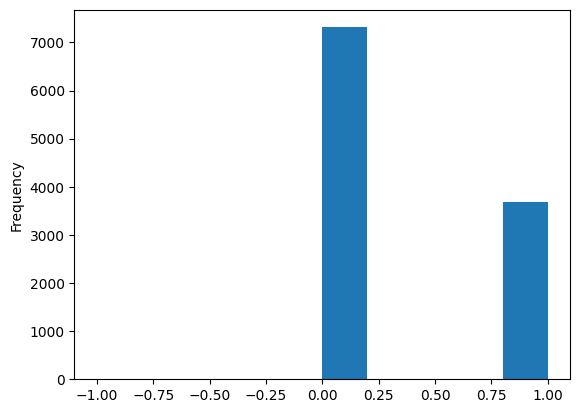

In [60]:
df['is_recid'].plot.hist();  

### Los valores negativos en la caracteristica is_recid no deberian aparecer  1 = reincidente  0= no reincidente

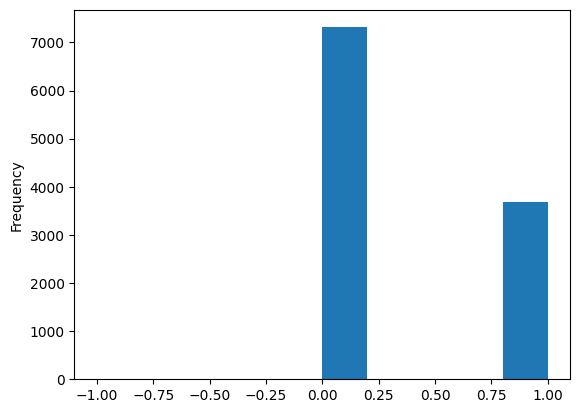

In [61]:
df['is_recid'].plot.hist();  

In [62]:
df.size

197856

In [63]:
df.info()   # se genera una reducción en el dataset, pero al final esto con el proposito de tener datos/información más acorde a lo necesidades del caso

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10992 entries, 0 to 11756
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10992 non-null  int64         
 1   name                     10992 non-null  object        
 2   age                      10992 non-null  int64         
 3   age_cat                  10992 non-null  object        
 4   sex                      10992 non-null  object        
 5   race                     10992 non-null  object        
 6   compas_screening_date    10992 non-null  datetime64[ns]
 7   decile_score             10992 non-null  int64         
 8   v_decile_score           10992 non-null  int64         
 9   c_charge_degree          10992 non-null  object        
 10  is_recid                 10992 non-null  int64         
 11  days_b_screening_arrest  10559 non-null  float64       
 12  r_offense_date           3676 no

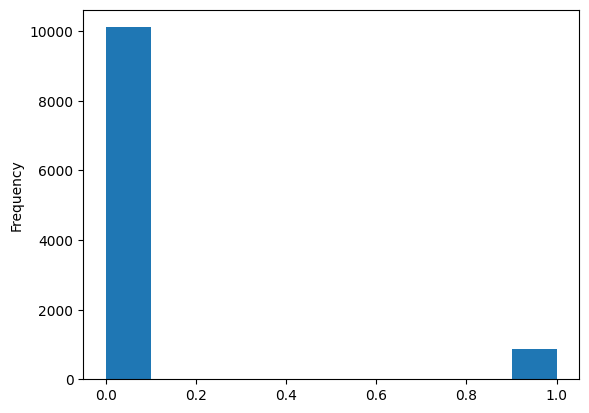

In [64]:
df['is_violent_recid'].plot.hist();  

**Vamos a realizar una tabla/agrupacion**

In [65]:
deciles1 = df.groupby('decile_score')['id'].count()
print(deciles1)

decile_score
1     2361
2     1474
3     1161
4     1124
5      979
6      940
7      860
8      756
9      760
10     577
Name: id, dtype: int64


### Tabla Pivote

Agrupar los valores de  is_violent_recid, indicando ademas is_violent_recid como columnas, conteo del deicle_score

### Tabla Pivote

Resume la información por rangos de edad, grupo etnico (race), nivel de incidencia 

#### Gráficas o tablas de correlación sobre las caracteristicas

In [66]:
corr_df = df.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,id,age,decile_score,v_decile_score,is_recid,days_b_screening_arrest,is_violent_recid,priors_count
id,1.000000,0.000478,0.008423,0.006768,0.011703,-0.005866,0.002265,0.007846
age,0.000478,1.000000,-0.372282,-0.563029,-0.157324,-0.043007,-0.086267,0.141955
decile_score,0.008423,-0.372282,1.000000,0.774836,0.283692,0.035764,0.153786,0.436355
v_decile_score,0.006768,-0.563029,0.774836,1.000000,0.251469,0.051988,0.159631,0.224782
is_recid,0.011703,-0.157324,0.283692,0.251469,1.000000,0.076064,0.415315,0.241837
days_b_screening_arrest,-0.005866,-0.043007,0.035764,0.051988,0.076064,1.000000,0.034800,-0.010278
is_violent_recid,0.002265,-0.086267,0.153786,0.159631,0.415315,0.034800,1.000000,0.091873
priors_count,0.007846,0.141955,0.436355,0.224782,0.241837,-0.010278,0.091873,1.000000


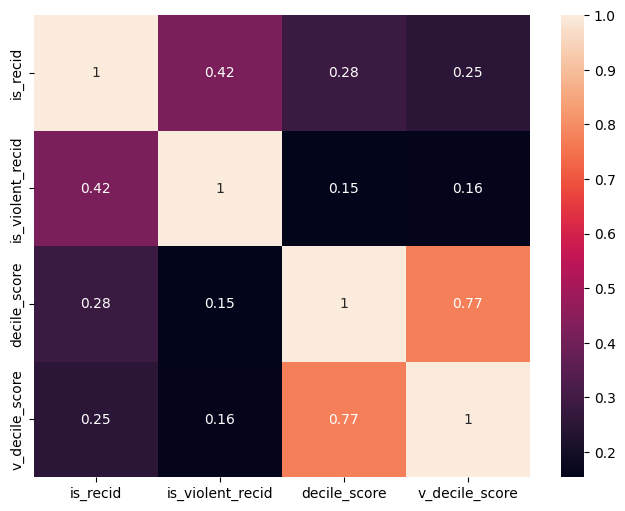

In [67]:
dfcorr = df[['is_recid', 'is_violent_recid', 'decile_score','v_decile_score']]
corr_df = dfcorr.corr(method='pearson')    #https://seaborn.pydata.org/examples/many_pairwise_correlations.html
plt.figure(figsize=(8, 6))             #https://www.delftstack.com/es/howto/python-pandas/pandas-correlation-matrix/
sns.heatmap(corr_df, annot=True)
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10992 entries, 0 to 11756
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10992 non-null  int64         
 1   name                     10992 non-null  object        
 2   age                      10992 non-null  int64         
 3   age_cat                  10992 non-null  object        
 4   sex                      10992 non-null  object        
 5   race                     10992 non-null  object        
 6   compas_screening_date    10992 non-null  datetime64[ns]
 7   decile_score             10992 non-null  int64         
 8   v_decile_score           10992 non-null  int64         
 9   c_charge_degree          10992 non-null  object        
 10  is_recid                 10992 non-null  int64         
 11  days_b_screening_arrest  10559 non-null  float64       
 12  r_offense_date           3676 no

Convertir las caracteristicas a categoricas

In [69]:
df1 = df.copy() 

In [70]:
df1.head(5)

,id,name,age,age_cat,sex,race,compas_screening_date,decile_score,v_decile_score,c_charge_degree,is_recid,days_b_screening_arrest,r_offense_date,is_violent_recid,vr_offense_date,c_jail_in,c_jail_out,priors_count
0,1,miguel hernandez,69,Greater than 45,Male,Other,2013-08-14,1,1,F,0,-1.0,NaT,0,NaT,2013-08-13 06:03:42,2013-08-14 05:41:20,0
2,3,kevon dixon,34,25 - 45,Male,African-American,2013-01-27,3,1,F,1,-1.0,2013-07-05,1,2013-07-05,2013-01-26 03:45:27,2013-02-05 05:36:53,0
3,4,ed philo,24,Less than 25,Male,African-American,2013-04-14,4,3,F,1,-1.0,2013-06-16,0,NaT,2013-04-13 04:58:34,2013-04-14 07:02:04,4
4,5,marcu brown,23,Less than 25,Male,African-American,2013-01-13,8,6,F,0,NaN,NaT,0,NaT,NaT,NaT,1
5,6,bouthy pierrelouis,43,25 - 45,Male,Other,2013-03-26,1,1,F,0,NaN,NaT,0,NaT,NaT,NaT,2


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10992 entries, 0 to 11756
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10992 non-null  int64         
 1   name                     10992 non-null  object        
 2   age                      10992 non-null  int64         
 3   age_cat                  10992 non-null  object        
 4   sex                      10992 non-null  object        
 5   race                     10992 non-null  object        
 6   compas_screening_date    10992 non-null  datetime64[ns]
 7   decile_score             10992 non-null  int64         
 8   v_decile_score           10992 non-null  int64         
 9   c_charge_degree          10992 non-null  object        
 10  is_recid                 10992 non-null  int64         
 11  days_b_screening_arrest  10559 non-null  float64       
 12  r_offense_date           3676 no

In [72]:
df1['name'] = df1['name'].astype('string')    # para que el modelo predictivo funcione se deben pasar a valores categoricos
df1['sex'] = df1['sex'].astype('category')
df1['race'] = df1['race'].astype('category')
df1['is_recid'] = df1['is_recid'].astype('category')
df1['is_violent_recid'] = df1['is_violent_recid'].astype('category')
df1['v_decile_score'] = df1['v_decile_score'].astype('category')
df1['c_charge_degree'] = df1['c_charge_degree'].astype('category')
df1['is_recid'] = df1['is_recid'].astype('category')

In [73]:
cm = pd.crosstab(df1.is_recid==1, df1.decile_score>=7, rownames=['prediccion'], colnames=['real'])
cm

real,False,True
prediccion,,
False,5862,1454
True,2177,1499


In [74]:
pip install statsmodels  

Note: you may need to restart the kernel to use updated packages.


este modelo de llamar a statmodels, por medio de investigacion en la web

In [75]:
import statsmodels.api as sm

In [76]:
from statsmodels.formula.api import ols

In [77]:
fit_decile_score = ols('decile_score ~ age + priors_count + C(sex) + C(race) + C(is_recid) + C(is_violent_recid)', data=df1).fit() 

# hemos de escribir C() si la variable es categórica

print(fit_decile_score.summary())

                            OLS Regression Results                            
Dep. Variable:           decile_score   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     717.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:03:47   Log-Likelihood:                -24225.
No. Observations:               10992   AIC:                         4.847e+04
Df Residuals:                   10980   BIC:                         4.856e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Relación entre caracteristicas

*  Existe existe una relación media-fuerte entre **decile_score** y **v_decile_score**  en un valor de 0.77
*  **is_recid** presenta una relación baja con las caracteristicas **decile_score** y **v_decile_score**, mientras que la relación aumenta a 0.38 con la caracteritica **is_violente_recid**

Los resultados nos indican que se depende que el valor **is_recid** sea con valor **1**, si una persona es no recid (0)  va tener un nivel de decil_score bajo o nulo (no es reincidente)

### El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante.
#### Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).


In [78]:
prediccion = fit_decile_score.predict(df1) 

In [79]:
cm = pd.crosstab(prediccion>=7, df1.decile_score>=7, rownames=['prediccion'], colnames=['real'])
cm

real,False,True
prediccion,,
False,7894,2297
True,145,656


### El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no.
### Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.      


In [80]:
is_recid_pivote = df.pivot_table(values='is_recid', index=['age_cat', 'sex'], columns='race', aggfunc='mean', fill_value=0)
is_recid_pivote

race                    African-American     Asian  Caucasian  Hispanic  \
age_cat         sex                                                       
25 - 45         Female          0.279874  0.000000   0.275194  0.242105   
                Male            0.422780  0.166667   0.312621  0.255765   
Greater than 45 Female          0.169118  1.000000   0.178030  0.150000   
                Male            0.317942  0.200000   0.220472  0.143590   
Less than 25    Female          0.323529  0.000000   0.237037  0.303030   
                Male            0.494505  0.333333   0.400000  0.401235   

race                    Native American     Other  
age_cat         sex                                
25 - 45         Female         0.500000  0.159420  
                Male           0.235294  0.258993  
Greater than 45 Female         0.333333  0.090909  
                Male           0.200000  0.166667  
Less than 25    Female         1.000000  0.125000  
                Male           0.666667  0.440000

In [81]:
recid_rates = round(df.pivot_table(index="decile_score", columns="race", values="priors_count",fill_value=0),2)
recid_rates

race,African-American,Asian,Caucasian,Hispanic,Native American,Other
decile_score,,,,,,
1,1.26,0.50,1.01,0.83,0.00,0.84
2,1.97,0.75,1.73,1.30,1.83,1.41
3,2.31,2.67,1.73,1.68,1.17,1.80
4,2.75,0.00,2.58,1.85,1.00,2.25
5,3.49,1.50,3.04,2.49,1.00,2.84
6,4.93,1.00,4.08,4.09,3.50,2.26
7,5.69,5.00,4.48,3.92,5.25,3.55
8,6.48,4.33,4.65,4.00,11.00,2.58
9,7.29,0.00,5.68,5.38,4.00,6.70


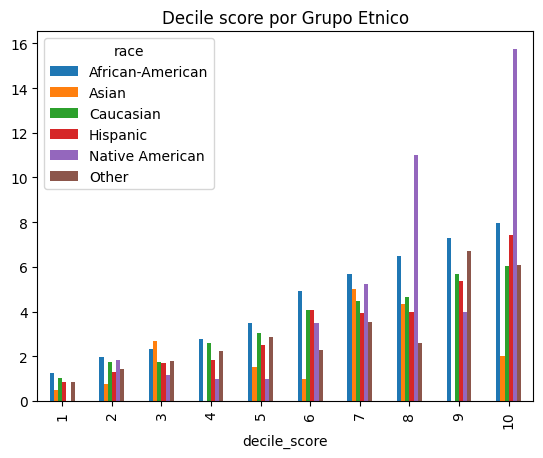

In [82]:
recid_rates.plot(kind = 'bar')
plt.title('Decile score por Grupo Etnico')
plt.show()

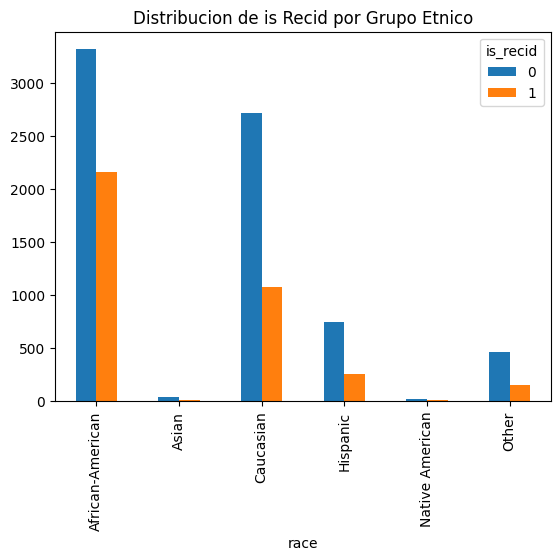

In [83]:
df_filter1=df[df['is_recid'] != -1]
df_filter1.pivot_table('decile_score', index= 'race', columns= 'is_recid', aggfunc= 'count',fill_value=0).plot(kind = 'bar')
plt.title('Distribucion de is Recid por Grupo Etnico');

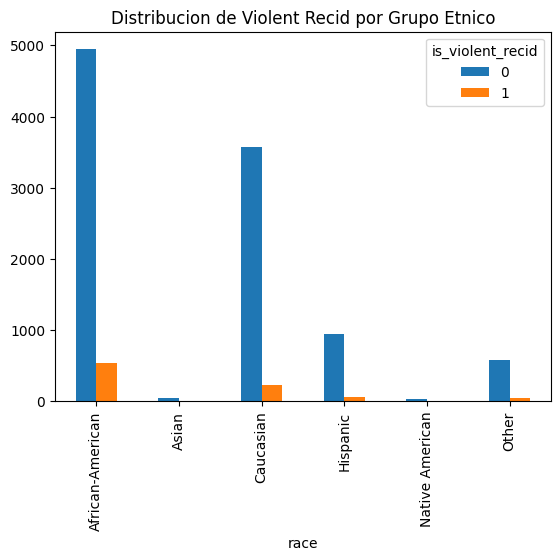

In [84]:
df_filter2=df[df['is_recid'] != -1]
df_filter2.pivot_table('decile_score', index= 'race', columns= 'is_violent_recid', aggfunc= 'count',fill_value=0).plot(kind = 'bar');
plt.title('Distribucion de Violent Recid por Grupo Etnico');

### ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?

In [85]:
df1['decile_score'] = df1['decile_score'].astype('category')
df1['v_decile_score'] = pd.to_numeric(df1['v_decile_score'])

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10992 entries, 0 to 11756
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       10992 non-null  int64         
 1   name                     10992 non-null  string        
 2   age                      10992 non-null  int64         
 3   age_cat                  10992 non-null  object        
 4   sex                      10992 non-null  category      
 5   race                     10992 non-null  category      
 6   compas_screening_date    10992 non-null  datetime64[ns]
 7   decile_score             10992 non-null  category      
 8   v_decile_score           10992 non-null  int64         
 9   c_charge_degree          10992 non-null  category      
 10  is_recid                 10992 non-null  category      
 11  days_b_screening_arrest  10559 non-null  float64       
 12  r_offense_date           3676 no

In [87]:
fit_v_decile_score = ols('v_decile_score ~ age + priors_count + C(sex) + C(race) + C(is_recid) + C(is_violent_recid)', data=df1).fit() 

print(fit_v_decile_score.summary())    # codigo de solucion por medio de investigacion en la red.

                            OLS Regression Results                            
Dep. Variable:         v_decile_score   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     805.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:03:50   Log-Likelihood:                -22432.
No. Observations:               10992   AIC:                         4.489e+04
Df Residuals:                   10980   BIC:                         4.498e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [88]:
prediccion2 = fit_v_decile_score.predict(df1)

In [89]:
cm = pd.crosstab(prediccion2>=7, df1.v_decile_score>=7, rownames=['prediccion'], colnames=['real'])  # aquellos que representan nivel de 7

TN = cm[False][False]   
TP = cm[True][True]
FN = cm[True][False]
FP = cm[False][True]

print('Accuracy: ', (TN+TP)/(TN+TP+FN+FP))
print('PPV: ', TP / (TP + FP))
print('FPR: ', FP / (FP + TN))
print('FNR: ', FN / (FN + TP))
print()

Accuracy:  0.8471615720524017
PPV:  0.6949152542372882
FPR:  0.0019377758639250726
FNR:  0.9759248385202584



### En este caso el nivel de Accuracy llega al 84 %, por lo que aparenta una mejoria en el proceso de predicción.

## Recomendaciones y Conclusiones Finales

#### Información general de los resultados de COMPAS

El dataset: Una base de datos que contiene los antecedentes penales, el tiempo de cárcel y prisión, la demografía y las puntuaciones de riesgo COMPAS de los acusados ​​del condado de Broward de 2013 y 2014.

Según la información investigada COMPAS presentó algunos problemas en el proceso de cálculo, tal y como lo indican algunos rescursos:
*   Se ha descubierto que el Perfil de Gestión de Infractores Correccionales para Sanciones Alternativas (COMPAS), una herramienta algorítmica de evaluación de riesgos de reincidencia utilizada en el sistema judicial para evaluar la probabilidad de reincidencia de los acusados, es menos preciso que los evaluadores humanos aleatorios no capacitados.
*  Específicamente, se ha argumentado que las evaluaciones de riesgo de COMPAS violan los derechos de Igualdad de Protección de la 14ª Enmienda por motivos de raza, ya que se argumenta que los algoritmos son racialmente discriminatorios, dan como resultado un trato desigual y no están específicamente diseñados.

#### Calidad de los datos

*  Establecer un formato para el registro de la información de los precidiarios, así como la información de relevante a la detención, categoría de crimen o delito.
*  Es una posibilidad legal el cambio de nombre en los EEUU (USA), por lo que tambien es importante que las autoridades judiciales y presidiarias puedan generar un registro de identidades para estos casos
*  Formatos de fechas: Este tiende a ser uno de los datos que pueden genera problemas en cuanto a formato, esto por variantes en ingreso de fechas mes, día año  o  día, mes, año, en lo que respecta a esta data es **necesario** que al ingresar los datos se tenga claro el formato en que lo lee el sistema.

* La mayor cantidad de los presidiarios corresponde a hombres entre las edades de 25 a 45 años, principalmente aquellos del grupo etnico  **Afroamericanos y Caucasicos***

In [90]:
is_recid_pivote = round(df.pivot_table(values='v_decile_score', index=['age_cat', 'sex'], columns='race', aggfunc='mean', fill_value=0),2)
is_recid_pivote

race                    African-American  Asian  Caucasian  Hispanic  \
age_cat         sex                                                    
25 - 45         Female              3.03   1.00       2.52      1.91   
                Male                4.26   2.08       2.97      2.79   
Greater than 45 Female              1.87   1.00       1.31      1.18   
                Male                2.50   1.40       1.53      1.63   
Less than 25    Female              5.59   5.00       5.19      4.42   
                Male                6.56   4.56       5.74      5.86   

race                    Native American  Other  
age_cat         sex                             
25 - 45         Female             3.83   1.84  
                Male               3.82   2.38  
Greater than 45 Female             3.67   1.09  
                Male               2.00   1.21  
Less than 25    Female             5.00   5.21  
                Male               7.00   5.67

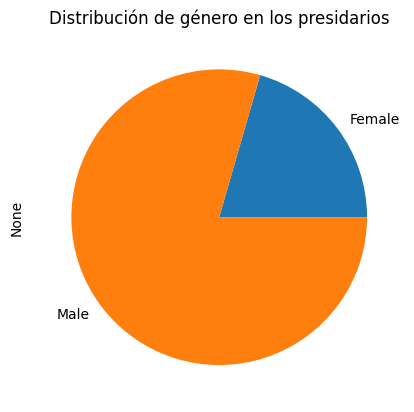

In [91]:
df.groupby('sex').size().plot(kind='pie')

# Agregar un título al gráfico
plt.title('Distribución de género en los presidarios')
# Mostrar el gráfico
plt.show()

### Capacidad de predicción

El modelo mejora la capacidad de predicción en los delitos menore, tomando en cuenta las variables que integran o puden influir en el valore del resultado.